In [1]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [2]:
movie_df = pd.read_csv(r'data/data_regression.csv')

In [3]:
print(movie_df.shape)
movie_df.dtypes

(3852, 42)


imdb_id                       object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
Biography                      int64
C

In [4]:
movie_df.head()

,imdb_id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio
0,tt0035423,James Mangold,125.0,123.0,446.0,821.0,Natasha Lyonne,20000.0,47095453.0,Comedy|Fantasy|Romance,...,1,0,0,0,0,8,6,3,4,0.981155
1,tt0080339,Jim Abrahams,134.0,88.0,104.0,318.0,Lloyd Bridges,628.0,83400000.0,Comedy,...,0,0,0,0,0,8,2,3,4,23.828571
2,tt0080453,Randal Kleiser,36.0,104.0,116.0,83.0,Christopher Atkins,1000.0,58853106.0,Adventure|Drama|Romance,...,0,0,1,0,0,7,3,3,3,13.078468
3,tt0080455,John Landis,125.0,148.0,644.0,326.0,Aretha Franklin,1000.0,54200000.0,Action|Comedy|Crime|Music,...,0,0,1,0,1,8,3,3,4,2.007407
4,tt0080487,Harold Ramis,71.0,98.0,11000.0,484.0,Rodney Dangerfield,13000.0,39800000.0,Comedy|Sport,...,0,0,0,0,1,7,7,3,5,6.633333


In [5]:
movie_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,gross_budget_ratio
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3.852000e+03,3.852000e+03,3852.000000,3852.000000,3852.000000,...,3852.00000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000
mean,160.910436,109.049325,762.463396,730.276739,7563.897715,4.929950e+07,9.813550e+04,11170.345275,1.379283,313.869938,...,0.23702,0.119678,0.336708,0.063084,0.132918,7.076064,4.046729,3.432503,4.333333,5.690951
std,121.840785,21.549751,2988.626715,1805.214756,15431.666830,7.034357e+07,1.468241e+05,18845.309090,2.045882,397.309921,...,0.42531,0.324627,0.472646,0.243146,0.339530,1.090874,1.987470,1.347786,1.547315,129.951090
min,1.000000,34.000000,0.000000,0.000000,0.000000,6.180800e+01,4.000000e+01,0.000000,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000018
25%,72.750000,95.000000,10.000000,183.000000,726.250000,6.108100e+06,1.647275e+04,1833.750000,0.000000,98.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,3.000000,3.000000,0.422215
50%,132.000000,105.000000,58.000000,427.500000,1000.000000,2.626054e+07,4.757350e+04,3897.500000,1.000000,193.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,3.000000,4.000000,1.020191
75%,217.000000,119.000000,218.000000,681.000000,12000.000000,6.334179e+07,1.148290e+05,15823.750000,2.000000,375.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,8.000000,5.000000,4.000000,5.000000,2.088305
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,1.200264e+09,1.689764e+06,656730.000000,43.000000,5060.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,7194.485533


# 1 IMDb rating prediction


##  1.1 Basic model 

Here we use varaiables: duration,budget,genres,director rank, actor1 rank,actor2 rank,actor3 rank, movie facebook likes,cast total facebook likes, facenumber in poster

In [6]:
data1 = movie_df[['duration','budget','Biography','Comedy','Crime','Drama','Romance',
                  'Mystery_Thriller_Horror','Sci-Fi_Fantasy','Family_Animation','Action_Adventure',
                  'History_War','Others','director_rank',
                 'actor1_rank','actor2_rank','actor3_rank','movie_facebook_likes','cast_total_facebook_likes'
                 ,'facenumber_in_poster']]

In [7]:
data1.head()

,duration,budget,Biography,Comedy,Crime,Drama,Romance,Mystery_Thriller_Horror,Sci-Fi_Fantasy,Family_Animation,Action_Adventure,History_War,Others,director_rank,actor1_rank,actor2_rank,actor3_rank,movie_facebook_likes,cast_total_facebook_likes,facenumber_in_poster
0,123.0,48000000.0,0,1,0,0,1,0,1,0,0,0,0,8,6,3,4,0,22209,1.0
1,88.0,3500000.0,0,1,0,0,0,0,0,0,0,0,0,8,2,3,4,16000,2726,0.0
2,104.0,4500000.0,0,0,0,1,1,0,0,0,1,0,0,7,3,3,3,0,1662,0.0
3,148.0,27000000.0,0,1,1,0,0,0,0,0,1,0,1,8,3,3,4,14000,2566,1.0
4,98.0,6000000.0,0,1,0,0,0,0,0,0,0,0,1,7,7,3,5,0,14921,3.0


In [8]:
y = movie_df['imdb_score']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.30)

MM = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_MM = MM.fit_transform(X_train) # standardize X_train
X_test_MM = MM.transform(X_test) # standardize X_test
X_train_scaled = pd.DataFrame(data=X_train_MM,  columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_MM,  columns=X_test.columns)

### 1.1.1) linear regression

In [10]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
print("linear regression R2:", r2_score(y_test, y_pred))
print("linear regression MSE:", mean_squared_error(y_test, y_pred, multioutput='raw_values'))


linear regression R2: 0.6631867382409
linear regression MSE: [0.37680578]


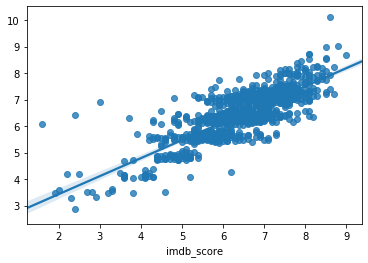

In [11]:
sns.regplot(y_test, y_pred )

### 1.1.2) ridge

In [12]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridridge.fit(X_train_scaled, y_train)

y_pred = gridridge.predict(X_test_scaled)

print("ridge best parameters:", gridridge.best_params_)
print("ridge score:", gridridge.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test_scaled)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.6}
ridge score: 0.6634115735628515
ridge MSE: 0.3765542443848192
ridge best estimator coef: [ 5.31205204e-01 -1.86936881e-01  1.70546894e-01 -3.56470348e-02
  5.13913944e-02  1.39916469e-01 -8.36599783e-02 -1.01504483e-01
 -6.01294558e-02  1.82241396e-03 -4.58753575e-02 -2.85838645e-02
  6.00588034e-02  5.48812204e+00  1.69770143e-01 -9.74849818e-02
 -3.72352205e-01  9.05503893e-01 -1.07363101e-01 -4.69491468e-01]


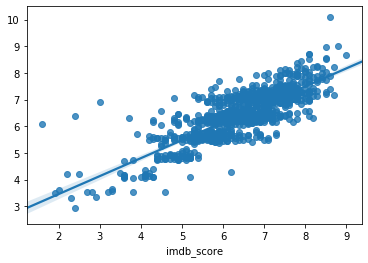

In [13]:
sns.regplot(y_test, y_pred )

### 1.1.3) lasso


In [14]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6542561107279278
lasso MSE: 0.38679680805906885
lasso best estimator coef: [ 0.         -0.          0.09347461 -0.05273314  0.          0.17531801
 -0.01941595 -0.04761846 -0.         -0.         -0.          0.
  0.          5.32635484  0.         -0.         -0.          0.
  0.         -0.        ]


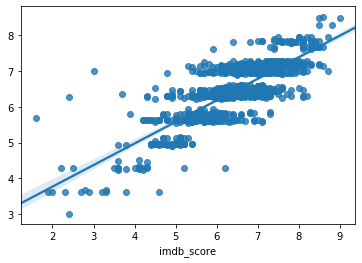

In [15]:
sns.regplot(y_test, y_pred )

### 1.1.4) elastic net

In [16]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
en = linear_model.ElasticNet()
griden = GridSearchCV(en, parameters, scoring ='r2')
griden.fit(X_train_scaled, y_train)

y_pred = griden.predict(X_test_scaled)

print("Elastic Net best parameters:", griden.best_params_)
print("Elastic Net score:", griden.score(X_test_scaled, y_test))
print("Elastic Net MSE:", mean_squared_error(y_test, griden.predict(X_test_scaled)))
print("Elastic Net best estimator coef:", griden.best_estimator_.coef_)

Elastic Net best parameters: {'alpha': 0.01}
Elastic Net score: 0.6354959317396909
Elastic Net MSE: 0.40778453214160987
Elastic Net best estimator coef: [ 0.13019306  0.          0.15737154 -0.10398537  0.02183639  0.23391487
 -0.06256048 -0.10709294 -0.02505926 -0.         -0.0104843   0.
  0.01053612  4.1768515   0.07123973 -0.         -0.11305172  0.54411105
  0.         -0.        ]


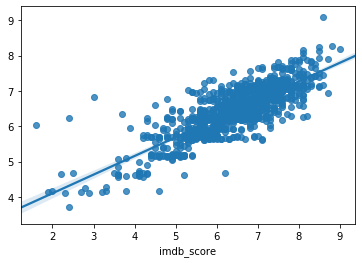

In [17]:
sns.regplot(y_test, y_pred )

### 1.1.5) decision tree

In [18]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
gridrf = GridSearchCV(DTR, parameters, scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("DTR best parameters:", gridrf.best_params_)
print("DTR score:", gridrf.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 0.0005, 'min_samples_split': 0.001}
DTR score: 0.6505644209958423
DTR MSE: 0.39092684144222273


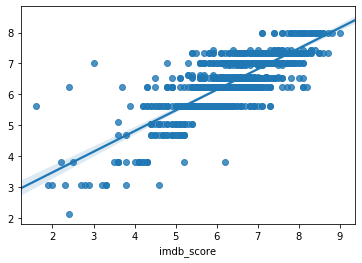

In [19]:
sns.regplot(y_test, y_pred )

### 1.1.6) random forest

In [20]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
gridrf = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("RFR best parameters:", gridrf.best_params_)
print("RFR score:", gridrf.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: 0.6830222900619465
RFR MSE: 0.3546149917155344


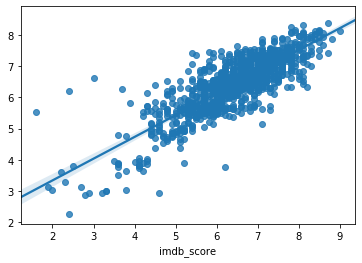

In [21]:
sns.regplot(y_test, y_pred)

## 2.1) Model without genres

Here we exclude genre from 1 Model

In [22]:
data2 = movie_df[['duration','budget','director_rank',
                 'actor1_rank','actor2_rank','actor3_rank'
                  ,'movie_facebook_likes','cast_total_facebook_likes','facenumber_in_poster']]

In [23]:
y = movie_df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size=0.30)

MM = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_MM = MM.fit_transform(X_train) # standardize X_train
X_test_MM = MM.transform(X_test) # standardize X_test
X_train_scaled = pd.DataFrame(data=X_train_MM,  columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_MM,  columns=X_test.columns)

### 2.1.1) linear regression

In [24]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
print("linear regression MSE:", mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("linear regression R2:", r2_score(y_test, y_pred))

linear regression MSE: [0.42562043]
linear regression R2: 0.6106704755562407


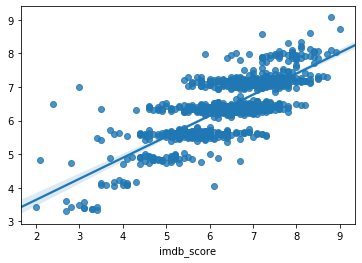

In [25]:
sns.regplot(y_test, y_pred)

### 2.1.2) ridge

In [26]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridridge.fit(X_train_scaled, y_train)

y_pred = gridridge.predict(X_test_scaled)

print("ridge best parameters:", gridridge.best_params_)
print("ridge score:", gridridge.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test_scaled)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.5}
ridge score: 0.6108270804086937
ridge MSE: 0.4254492305608588
ridge best estimator coef: [ 0.75784706 -0.44724644  5.78149237  0.09998909 -0.03849125 -0.45092983
  1.00108625  0.15780433 -0.53611498]


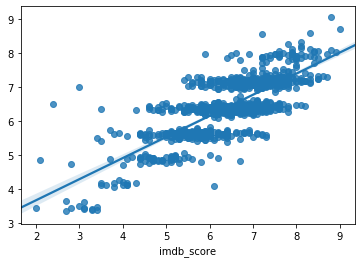

In [27]:
sns.regplot(y_test, y_pred)

### 2.1.3) lasso

In [28]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.5982225224644242
lasso MSE: 0.43922870803473024
lasso best estimator coef: [ 0.         -0.          5.61624773  0.         -0.         -0.
  0.          0.         -0.        ]


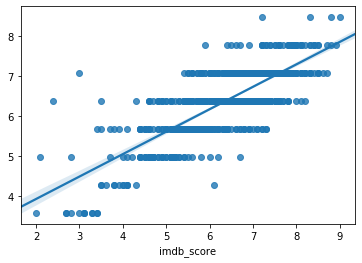

In [29]:
sns.regplot(y_test, y_pred)

### 2.1.4 elastic net

In [30]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
en = linear_model.ElasticNet()
gridlasso = GridSearchCV(en, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.5771627837556905
lasso MSE: 0.46225150632925904
lasso best estimator coef: [ 0.41697164  0.          4.53695021  0.08906321 -0.         -0.17278314
  0.23547904  0.         -0.        ]


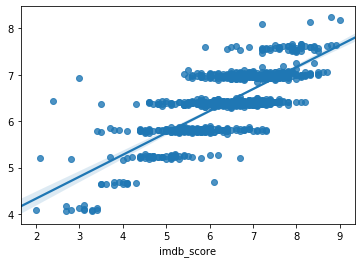

In [31]:
sns.regplot(y_test, y_pred)

### 2.1.5) decision tree

In [32]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
gridrf = GridSearchCV(DTR, parameters, scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("DTR best parameters:", gridrf.best_params_)
print("DTR score:", gridrf.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.025, 'min_samples_split': 0.001}
DTR score: 0.6299709249953853
DTR MSE: 0.40452091427940245


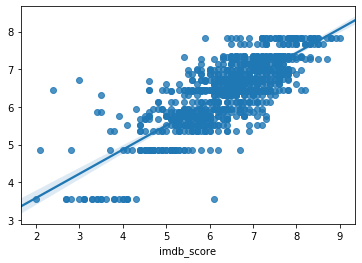

In [33]:
sns.regplot(y_test, y_pred )

### 2.1.6) random forest

In [34]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
gridrf = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("RFR best parameters:", gridrf.best_params_)
print("RFR score:", gridrf.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: 0.6586402164966703
RFR MSE: 0.37317924738552977


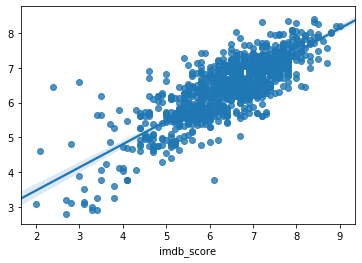

In [35]:
sns.regplot(y_test, y_pred)

##  3) Model with logs


Here we will transform  budget s to log values. 

In [36]:
data3 = movie_df[['duration','Biography','Comedy','Crime','Drama','Romance',
                  'Mystery_Thriller_Horror','Sci-Fi_Fantasy','Family_Animation','Action_Adventure',
                  'History_War','Others','director_rank',
                 'actor1_rank','actor2_rank','actor3_rank','movie_facebook_likes','cast_total_facebook_likes'
                 ,'facenumber_in_poster']]

In [37]:
budget = np.log(movie_df['budget'])
data3['log_budget'] = budget

In [38]:
y = movie_df['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(data3, y, test_size=0.30)
MM = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_MM = MM.fit_transform(X_train) # standardize X_train
X_test_MM = MM.transform(X_test) # standardize X_test
X_train_scaled = pd.DataFrame(data=X_train_MM,  columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_MM,  columns=X_test.columns)

### 3.1.1) linear regression

In [39]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
print("linear regression MSE:", mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("linear regression R2:", r2_score(y_test, y_pred))

linear regression MSE: [0.40851515]
linear regression R2: 0.6278033874387964


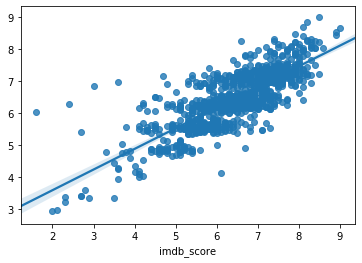

In [40]:
sns.regplot(y_test, y_pred)

### 3.1.2) ridge

In [41]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridridge.fit(X_train_scaled, y_train)

y_pred = gridridge.predict(X_test_scaled)

print("ridge best parameters:", gridridge.best_params_)
print("ridge score:", gridridge.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test_scaled)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.7000000000000001}
ridge score: 0.6280850859998717
ridge MSE: 0.4082059630617203
ridge best estimator coef: [ 0.91920626  0.16193419 -0.07466879  0.03909205  0.1112898  -0.01853609
 -0.09940324 -0.05393472  0.07581376  0.01989561 -0.01771375  0.050916
  5.48645735  0.22913974  0.02469167 -0.21375935  1.49261356 -0.22257815
 -0.30757729 -1.24465707]


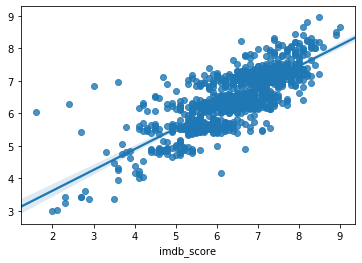

In [42]:
sns.regplot(y_test, y_pred)

### 3.1.3) lasso


In [43]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6073379791250701
lasso MSE: 0.4309775498515145
lasso best estimator coef: [ 0.          0.05648266 -0.09722185  0.          0.16949775 -0.
 -0.06436565 -0.         -0.         -0.          0.          0.
  5.33516833  0.         -0.         -0.          0.          0.
 -0.         -0.        ]


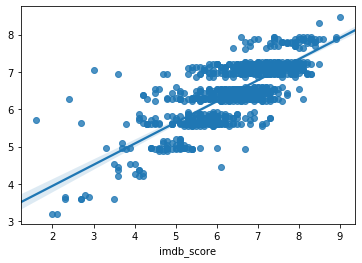

In [44]:
sns.regplot(y_test, y_pred)

### 3.1.4) elastic net

In [45]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
en = linear_model.ElasticNet()
gridlasso = GridSearchCV(en, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.5849573326301001
lasso MSE: 0.45554207526449664
lasso best estimator coef: [ 1.00826068e-01  1.20761619e-01 -1.62799661e-01  0.00000000e+00
  2.31781592e-01 -1.40902453e-02 -1.14607243e-01 -1.64514229e-02
 -0.00000000e+00 -1.08066778e-03  0.00000000e+00  2.48959246e-02
  4.25402264e+00  7.96859084e-02 -0.00000000e+00 -2.46253955e-02
  3.36351432e-01  0.00000000e+00 -2.02164542e-02 -0.00000000e+00]


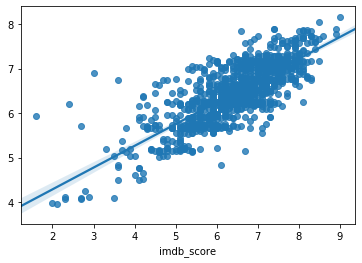

In [46]:
sns.regplot(y_test, y_pred)

### 3.1.5) decision tree

In [47]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
gridrf = GridSearchCV(DTR, parameters, scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("DTR best parameters:", gridrf.best_params_)
print("DTR score:", gridrf.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.025, 'min_samples_split': 0.001}
DTR score: 0.6216241203474543
DTR MSE: 0.4152973826503761


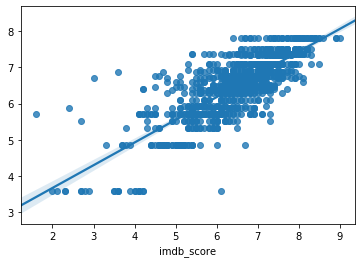

In [48]:
sns.regplot(y_test, y_pred )

### 3.1.6) random forest

In [49]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
gridrf = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("RFR best parameters:", gridrf.best_params_)
print("RFR score:", gridrf.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: 0.6491059110778434
RFR MSE: 0.3851339489469477


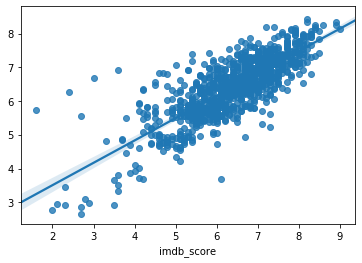

In [50]:
sns.regplot(y_test, y_pred)

## 4) Model only with films with likes

### All years

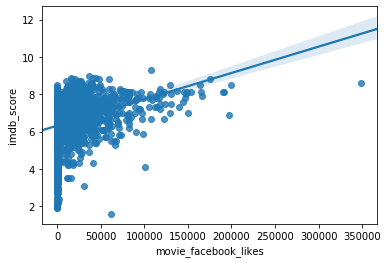

In [51]:
sns.regplot(movie_df['movie_facebook_likes'], movie_df['imdb_score'])

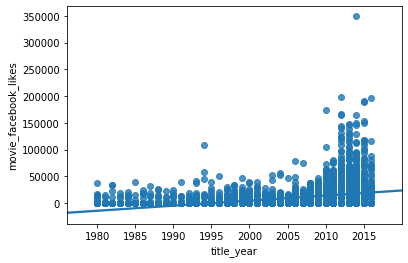

In [52]:
sns.regplot(movie_df['title_year'],movie_df['movie_facebook_likes'])

Here we include only movies with facebook likes and facebook cast likes

In [53]:
new = movie_df.query("movie_facebook_likes != 0")
y = new['imdb_score']
new = new.query("cast_total_facebook_likes != 0")

In [54]:
data4 = new[['duration','budget','Biography','Comedy','Crime','Drama','Romance',
                  'Mystery_Thriller_Horror','Sci-Fi_Fantasy','Family_Animation','Action_Adventure',
                  'History_War','Others','director_rank',
                 'actor1_rank','actor2_rank','actor3_rank'
                  ,'movie_facebook_likes','cast_total_facebook_likes','facenumber_in_poster']]

In [55]:
y = new['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(data4, y, test_size=0.30)
MM = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_MM = MM.fit_transform(X_train) # standardize X_train
X_test_MM = MM.transform(X_test) # standardize X_test
X_train_scaled = pd.DataFrame(data=X_train_MM,  columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_MM,  columns=X_test.columns)

### 4.1.1) linear regression

In [56]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
print("linear regression MSE:", mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("linear regression R2:", r2_score(y_test, y_pred))

linear regression MSE: [0.46997179]
linear regression R2: 0.6634937552840556


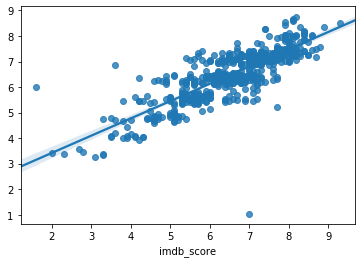

In [57]:
sns.regplot(y_test, y_pred)

### 4.1.2) ridge

In [58]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridridge.fit(X_train_scaled, y_train)

y_pred = gridridge.predict(X_test_scaled)

print("ridge best parameters:", gridridge.best_params_)
print("ridge score:", gridridge.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test_scaled)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.8}
ridge score: 0.6982520839495945
ridge MSE: 0.4214275718973276
ridge best estimator coef: [ 0.63439842 -0.63276369  0.1127356  -0.06895098  0.03447802  0.16164712
 -0.1011184  -0.11678149 -0.00595749  0.06094553 -0.05192045 -0.03905464
  0.02684402  5.52329461  0.16838821  0.07673407 -0.34104471  1.56591534
 -0.36243111 -0.28447344]


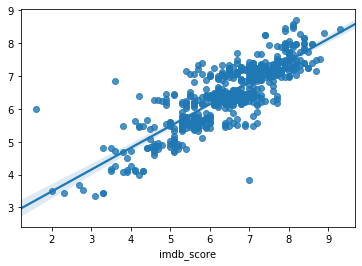

In [59]:
sns.regplot(y_test, y_pred)

### 4.1.3) lasso

In [60]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6980166587521504
lasso MSE: 0.42175637174662217
lasso best estimator coef: [ 0.         -0.          0.02390436 -0.09530832 -0.          0.15428306
 -0.02878049 -0.04582055  0.         -0.         -0.          0.
  0.          5.63589043  0.          0.         -0.          0.
  0.         -0.        ]


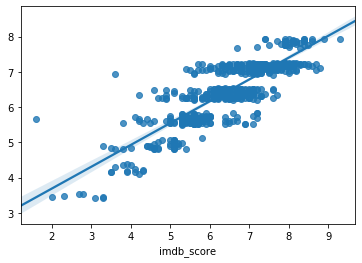

In [61]:
sns.regplot(y_test, y_pred)

### 4.1.4) elastic net

In [62]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
en = linear_model.ElasticNet()
gridlasso = GridSearchCV(en, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6742535472614226
lasso MSE: 0.45494443981132443
lasso best estimator coef: [ 1.62333841e-01  0.00000000e+00  1.07834262e-01 -1.53455680e-01
  0.00000000e+00  2.30197777e-01 -6.87896549e-02 -1.17315350e-01
  0.00000000e+00 -0.00000000e+00 -1.32242789e-03  0.00000000e+00
  0.00000000e+00  4.45213777e+00  8.59392665e-02  0.00000000e+00
 -4.33736112e-02  7.51771672e-01  0.00000000e+00 -0.00000000e+00]


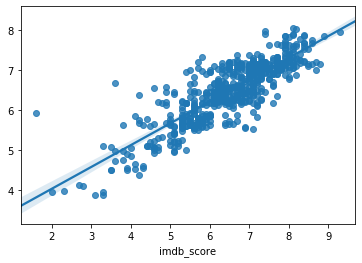

In [63]:
sns.regplot(y_test, y_pred)

### 4.1.5) decision tree

In [64]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
gridrf = GridSearchCV(DTR, parameters, scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("DTR best parameters:", gridrf.best_params_)
print("DTR score:", gridrf.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 0.025, 'min_samples_split': 0.001}
DTR score: 0.7078022010977133
DTR MSE: 0.40808967470901886


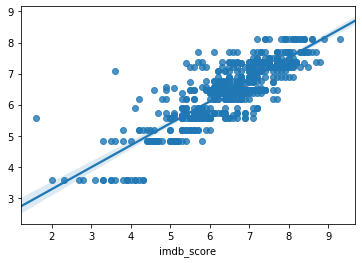

In [65]:
sns.regplot(y_test, y_pred )

### 4.1.6) random forest

In [66]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
gridrf = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("RFR best parameters:", gridrf.best_params_)
print("RFR score:", gridrf.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: 0.7177579818097206
RFR MSE: 0.3941852191398786


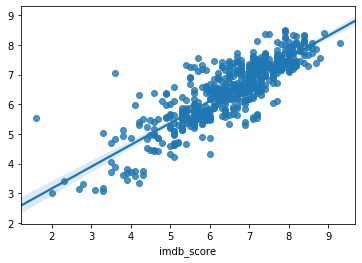

In [67]:
sns.regplot(y_test, y_pred )

## 5) Model using data from 2009 (facebook likes effect)

In [68]:
years = movie_df.query("title_year >= 2009")


In [69]:
data5 = years[['duration','budget','Biography','Comedy','Crime','Drama','Romance',
                  'Mystery_Thriller_Horror','Sci-Fi_Fantasy','Family_Animation','Action_Adventure',
                  'History_War','Others','director_rank',
                 'actor1_rank','actor2_rank','actor3_rank'
                  ,'movie_facebook_likes','cast_total_facebook_likes','facenumber_in_poster']]

In [70]:
y = years['imdb_score']
X_train, X_test, y_train, y_test = train_test_split(data5, y, test_size=0.30)
MM = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_MM = MM.fit_transform(X_train) # standardize X_train
X_test_MM = MM.transform(X_test) # standardize X_test
X_train_scaled = pd.DataFrame(data=X_train_MM,  columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_MM,  columns=X_test.columns)

### 5.1.1) linear regression

In [71]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
print("linear regression MSE:", mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("linear regression R2:", r2_score(y_test, y_pred))

linear regression MSE: [0.31706758]
linear regression R2: 0.6474561701438266


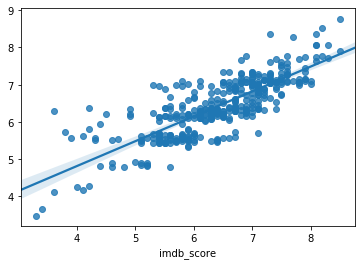

In [72]:
sns.regplot(y_test, y_pred)

### 5.1.2) ridge

In [73]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridridge.fit(X_train_scaled, y_train)

y_pred = gridridge.predict(X_test_scaled)

print("ridge best parameters:", gridridge.best_params_)
print("ridge score:", gridridge.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test_scaled)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.4}
ridge score: 0.6476055687742933
ridge MSE: 0.31693321864500346
ridge best estimator coef: [ 0.22903899 -0.39233502  0.21748526 -0.02128856  0.0260979   0.10171322
 -0.01187249 -0.060628   -0.03159234  0.23459386 -0.01819967 -0.01480143
  0.0506309   5.12158783  0.06435736 -0.05825751 -0.45891918  1.89300748
 -0.00764723 -0.05317144]


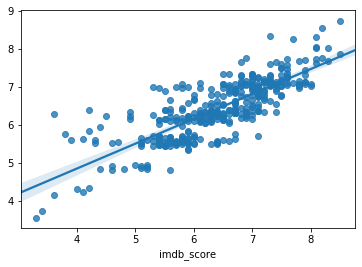

In [74]:
sns.regplot(y_test, y_pred)

### 5.1.3) lasso

In [75]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6276975076856719
lasso MSE: 0.33483794505016307
lasso best estimator coef: [ 0.00000000e+00  0.00000000e+00  1.41543620e-01 -3.53001773e-03
 -0.00000000e+00  1.02249546e-01 -0.00000000e+00 -1.04762644e-02
  0.00000000e+00  2.44201994e-02  0.00000000e+00  0.00000000e+00
  1.33381043e-02  5.06997301e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  5.59481477e-01 -0.00000000e+00 -0.00000000e+00]


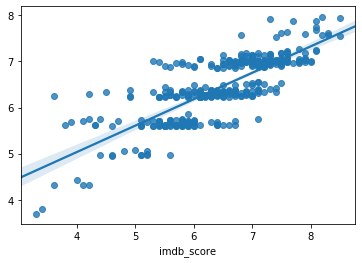

In [76]:
sns.regplot(y_test, y_pred)

### 5.1.4) elastic net

In [77]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
en = linear_model.ElasticNet()
gridlasso = GridSearchCV(en, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.607719512407959
lasso MSE: 0.3528055682144033
lasso best estimator coef: [ 0.19125801  0.          0.20629843 -0.04254962  0.          0.17768849
 -0.         -0.05187585 -0.          0.12019801  0.          0.
  0.03875399  3.83028586  0.         -0.         -0.14638792  1.14003799
  0.         -0.        ]


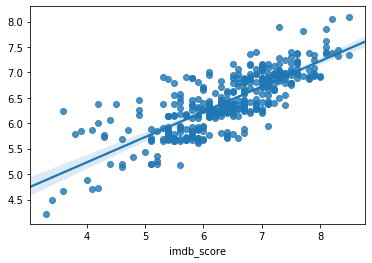

In [78]:
sns.regplot(y_test, y_pred)

### 5.1.5) decision tree

In [79]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
gridrf = GridSearchCV(DTR, parameters, scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("DTR best parameters:", gridrf.best_params_)
print("DTR score:", gridrf.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 0.005, 'min_samples_split': 0.05}
DTR score: 0.6186155831024294
DTR MSE: 0.34300596172297676


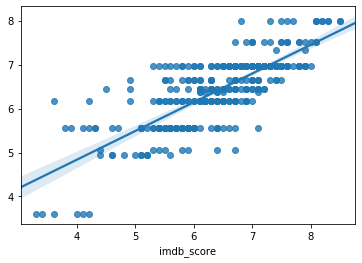

In [80]:
sns.regplot(y_test, y_pred )

### 5.1.6) random forest

In [81]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
gridrf = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("RFR best parameters:", gridrf.best_params_)
print("RFR score:", gridrf.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}
RFR score: 0.6426949361012189
RFR MSE: 0.32134969768312976


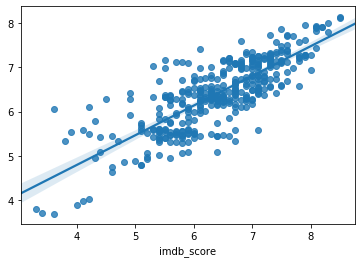

In [82]:
sns.regplot(y_test, y_pred)

# 6) Model without facebook likes

MSE lower than in the model with likes, but R2 is lower

In [83]:
data5 = movie_df[['duration','budget','Biography','Comedy','Crime','Drama','Romance',
                  'Mystery_Thriller_Horror','Sci-Fi_Fantasy','Family_Animation','Action_Adventure',
                  'History_War','Others','director_rank',
                 'actor1_rank','actor2_rank','actor3_rank'
                 ,'facenumber_in_poster']]

In [84]:
y = movie_df['imdb_score']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(data5, y, test_size=0.30)

MM = MinMaxScaler(feature_range=(0, 1), copy=True)
X_train_MM = MM.fit_transform(X_train) # standardize X_train
X_test_MM = MM.transform(X_test) # standardize X_test
X_train_scaled = pd.DataFrame(data=X_train_MM,  columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_MM,  columns=X_test.columns)

### 6.1.1) linear regression

In [86]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred= lr.predict(X_test_scaled)
print("linear regression R2:", r2_score(y_test, y_pred))
print("linear regression MSE:", mean_squared_error(y_test, y_pred, multioutput='raw_values'))


linear regression R2: 0.6417034079191827
linear regression MSE: [0.39819847]


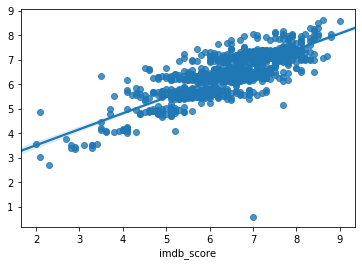

In [87]:
sns.regplot(y_test, y_pred)

### 6.1.2) ridge

In [88]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
ridge = linear_model.Ridge()
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')
gridridge.fit(X_train_scaled, y_train)

y_pred = gridridge.predict(X_test_scaled)

print("ridge best parameters:", gridridge.best_params_)
print("ridge score:", gridridge.score(X_test_scaled, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test_scaled)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)

ridge best parameters: {'alpha': 0.6}
ridge score: 0.6565729464005594
ridge MSE: 0.38167297738747075
ridge best estimator coef: [ 0.64452291 -1.02667717  0.123564   -0.07292014  0.04728959  0.15338063
 -0.06025202 -0.11843069 -0.02760872  0.00864076 -0.02679358 -0.03818478
  0.05521459  5.53695668  0.19753015 -0.1116177  -0.30134528 -0.549059  ]


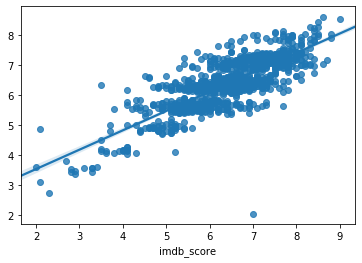

In [89]:
sns.regplot(y_test, y_pred)

### 6.1.3) lasso


In [90]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
lasso = linear_model.Lasso()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train_scaled, y_train)

y_pred = gridlasso.predict(X_test_scaled)

print("lasso best parameters:", gridlasso.best_params_)
print("lasso score:", gridlasso.score(X_test_scaled, y_test))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test_scaled)))
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)

lasso best parameters: {'alpha': 0.01}
lasso score: 0.6688872469572279
lasso MSE: 0.36798728865489405
lasso best estimator coef: [ 0.         -0.          0.05032446 -0.0697988   0.          0.20507556
 -0.         -0.05125553 -0.         -0.         -0.          0.
  0.00943277  5.21153122  0.         -0.         -0.         -0.        ]


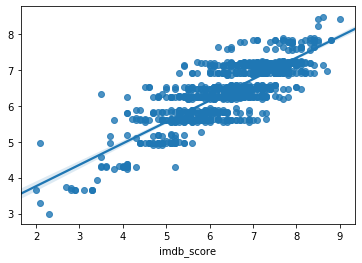

In [91]:
sns.regplot(y_test, y_pred)

### 6.1.4) elastic net

In [92]:
parameters = {'alpha': np.concatenate((np.arange(0.01,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
en = lasso = linear_model.ElasticNet()
griden = GridSearchCV(en, parameters, scoring ='r2')
griden.fit(X_train_scaled, y_train)

y_pred = griden.predict(X_test_scaled)

print("Elastic Net best parameters:", griden.best_params_)
print("Elastic Net score:", griden.score(X_test_scaled, y_test))
print("Elastic Net MSE:", mean_squared_error(y_test, griden.predict(X_test_scaled)))
print("Elastic Net best estimator coef:", griden.best_estimator_.coef_)

Elastic Net best parameters: {'alpha': 0.01}
Elastic Net score: 0.6326135197782241
Elastic Net MSE: 0.4083006574132537
Elastic Net best estimator coef: [ 0.08882899 -0.          0.1204063  -0.13617227  0.02354296  0.26250395
 -0.04282299 -0.11221289 -0.00957603 -0.         -0.00806328  0.
  0.03067809  4.16804497  0.08486358 -0.         -0.06414274 -0.        ]


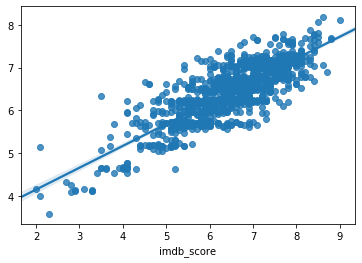

In [93]:
sns.regplot(y_test, y_pred)

### 6.1.5) decision tree

In [94]:
DTSplitList=[0.001,0.01,0.05,0.1,0.5,0.99]
DTLeafList=[0.0005,0.005,0.025,0.05,0.1,0.25,0.5]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-3)),'min_samples_leaf': DTLeafList, 'min_samples_split':DTSplitList}
DTR = DecisionTreeRegressor(random_state=10)
gridrf = GridSearchCV(DTR, parameters, scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("DTR best parameters:", gridrf.best_params_)
print("DTR score:", gridrf.score(X_test, y_test))
print("DTR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

DTR best parameters: {'criterion': 'mse', 'max_depth': 100, 'min_samples_leaf': 0.005, 'min_samples_split': 0.1}
DTR score: 0.669952016485152
DTR MSE: 0.3668039405415324


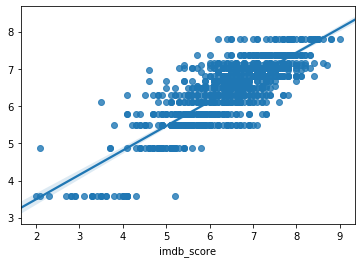

In [95]:
sns.regplot(y_test, y_pred )

### 6.1.6) random forest

In [96]:
RFEstimatorList = [25,50,100,200]
criterion =['mse']
parameters = {'criterion':criterion,'max_depth':list(range(100,0,-10)),'n_estimators':RFEstimatorList}

RFR = RandomForestRegressor(random_state=10)
gridrf = GridSearchCV(RFR, parameters, cv=5, verbose=0,scoring ='r2')
gridrf.fit(X_train, y_train)

y_pred = gridrf.predict(X_test)

print("RFR best parameters:", gridrf.best_params_)
print("RFR score:", gridrf.score(X_test, y_test))
print("RFR MSE:", mean_squared_error(y_test, gridrf.predict(X_test)))

RFR best parameters: {'criterion': 'mse', 'max_depth': 10, 'n_estimators': 100}
RFR score: 0.6839551353639313
RFR MSE: 0.3512413573985977


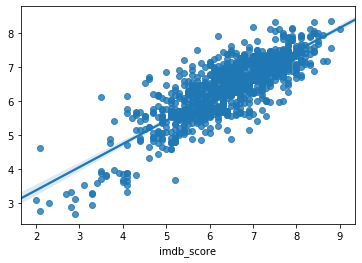

In [97]:
sns.regplot(y_test, y_pred )

# 2 Connection with the director rank and profitability

In [98]:
years = movie_df.query("title_year >= 1980")

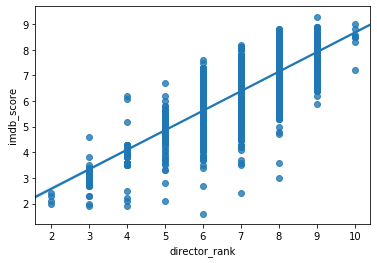

In [99]:
sns.regplot(years['director_rank'], years['imdb_score'])

In [100]:
d2 = years.query('director_rank == 2')
d3 = years.query('director_rank == 3')
d4 = years.query('director_rank == 4')
d5 = years.query('director_rank == 5')
d6 = years.query('director_rank == 6')
d7 = years.query('director_rank == 7')
d8 = years.query('director_rank == 8')
d9 = years.query('director_rank == 9')
d10 = years.query('director_rank == 10')

In [101]:
imdb_mean2 = d2['imdb_score'].mean()
imdb_mean3 = d3['imdb_score'].mean()
imdb_mean4 = d4['imdb_score'].mean()
imdb_mean5 = d5['imdb_score'].mean()
imdb_mean6 = d6['imdb_score'].mean()
imdb_mean7 = d7['imdb_score'].mean()
imdb_mean8 = d8['imdb_score'].mean()
imdb_mean9 = d9['imdb_score'].mean()
imdb_mean10 = d10['imdb_score'].mean()
rank = [2,3,4,5,6,7,8,9,10]
imdb_mean =[imdb_mean2,imdb_mean3,imdb_mean4,imdb_mean5,imdb_mean6,imdb_mean7,imdb_mean8,imdb_mean9,imdb_mean10]

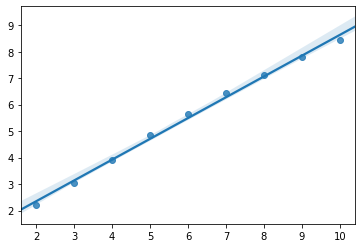

In [102]:
sns.regplot(rank, imdb_mean)

In [103]:
y = np.array([imdb_mean2,imdb_mean3,imdb_mean4,imdb_mean5,imdb_mean6,
              imdb_mean7,imdb_mean8,imdb_mean9,imdb_mean10]).reshape((-1, 1))
x = np.array([2,3,4,5,6,7,8,9,10]).reshape((-1,1))
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.9959647753254712
intercept: [0.77418686]
slope: [[0.78632475]]


So we can see that our linear model can predict mean imdb score by director rank. Now we will try to connect that to the gross/budget ratio.

In [104]:
years = years.query("gross_budget_ratio <= 10")

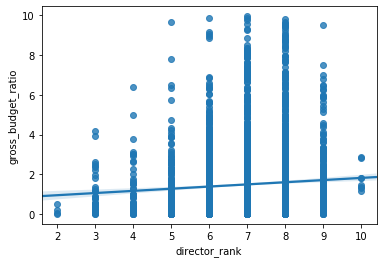

In [105]:
sns.regplot(years['director_rank'], years['gross_budget_ratio'])

In [106]:
d2 = years.query('director_rank == 2')
d3 = years.query('director_rank == 3')
d4 = years.query('director_rank == 4')
d5 = years.query('director_rank == 5')
d6 = years.query('director_rank == 6')
d7 = years.query('director_rank == 7')
d8 = years.query('director_rank == 8')
d9 = years.query('director_rank == 9')
d10 = years.query('director_rank == 10')

In [107]:
gb_mean2 = d2['gross_budget_ratio'].mean()
gb_mean3 = d3['gross_budget_ratio'].mean()
gb_mean4 = d4['gross_budget_ratio'].mean()
gb_mean5 = d5['gross_budget_ratio'].mean()
gb_mean6 = d6['gross_budget_ratio'].mean()
gb_mean7 = d7['gross_budget_ratio'].mean()
gb_mean8 = d8['gross_budget_ratio'].mean()
gb_mean9 = d9['gross_budget_ratio'].mean()
gb_mean10 = d10['gross_budget_ratio'].mean()

imdb_mean2 = d2['imdb_score'].mean()
imdb_mean3 = d3['imdb_score'].mean()
imdb_mean4 = d4['imdb_score'].mean()
imdb_mean5 = d5['imdb_score'].mean()
imdb_mean6 = d6['imdb_score'].mean()
imdb_mean7 = d7['imdb_score'].mean()
imdb_mean8 = d8['imdb_score'].mean()
imdb_mean9 = d9['imdb_score'].mean()
imdb_mean10 = d10['imdb_score'].mean()

imdb_mean =[imdb_mean2,imdb_mean3,imdb_mean4,imdb_mean5,imdb_mean6,imdb_mean7,imdb_mean8,imdb_mean9,imdb_mean10]

gb_mean =[gb_mean2,gb_mean3,gb_mean4,gb_mean5,gb_mean6,gb_mean7,gb_mean8,gb_mean9,gb_mean10]

In [108]:
x = np.array([imdb_mean2,imdb_mean3,imdb_mean4,imdb_mean5,imdb_mean6,
              imdb_mean7,imdb_mean8,imdb_mean9,imdb_mean10]).reshape((-1, 1))
y = np.array([gb_mean2,gb_mean3,gb_mean4,gb_mean5,gb_mean6,gb_mean7,gb_mean8,gb_mean9,gb_mean10]).reshape((-1,1))
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
mse = np.square(np.subtract(y ,x*model.coef_ +model.intercept_ )).mean() 
print('MSE:', mse)
print('R2:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

MSE: 0.046448580843787474
R2: 0.8037532302233317
intercept: [0.1614089]
slope: [[0.21428941]]


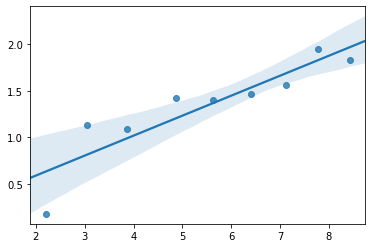

In [109]:
sns.regplot(imdb_mean, gb_mean)